### This Notebook was created in google Colab therefore the archives were accesses via GDrive

#### Check ENEM2022 pt1 for the data extraction

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [12]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [13]:
# Replace the IDs to your respective archive IDs on GDrive
dfile = drive.CreateFile({'id':'########'})
dfile.GetContentFile('enem_tw_txt.csv')

In [14]:
imfile = drive.CreateFile({'id':'#######'})
imfile.GetContentFile('books.png')

In [15]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [16]:
with open('enem_tw_txt.csv','r') as f:
  reader = csv.reader(f)
  tweets = []
  for t in list(reader):
    tweets.append(t[1])
print(tweets)

['text', 'Estudando para ENEM e vestibulares na https://t.co/itIK8xttgO - questões, provas, simulados e redação #estudacom #enem', 'ENEM\nMATEMÁTICA - QUESTÃO 138 - ENEM 2014\nSolução amanhã no mesmo horário.\n#ENEM #Vestibular #EnsinoMédio #Matemática https://t.co/KzmJUPH6Gu', 'Efeito de Lichtenberg.\nA química das coisas. Ep#58\n#química #cotidiano #curiosidades #cainoenem #professor #enem #vestibular #lichtenberg #fisica #eletricidade https://t.co/95WREDTOcQ', 'Para que serve o umbigo???\n.\nSiga o link 👇👇👇👇👇\nhttps://t.co/IHgENTNUr8\n.\n#biologia #biólogo #ciências #corpohumano #curiosidades #enem #fisiologia #professordebiologia #umbigo #vivaabiologia https://t.co/gLxUT6mTFY', '#enem \nComo  estudar para o Enem agora? Também não sei a resposta, mas só estuda que você consegue.', 'Você sabe o que muda no #NovoEnem? Acompanhe a thread!\n\n#Enem2024 #Enem #CNE', '#enem2022 #isençãodoenem #emalta #enem @inep_oficial @mineducacao https://t.co/dPFYra7Aw2', 'Mudanças sutis que fazem a di

In [17]:
stop_words = set(stopwords.words('portuguese'))
word_tokens = []
for tweet in tweets:
    word_tokens = word_tokens + word_tokenize(tweet)

filtered_tweets = [w for w in word_tokens if not w in stop_words]

In [18]:
print(word_tokens[:10])
print(filtered_tweets[:10])

['text', 'Estudando', 'para', 'ENEM', 'e', 'vestibulares', 'na', 'https', ':', '//t.co/itIK8xttgO']
['text', 'Estudando', 'ENEM', 'vestibulares', 'https', ':', '//t.co/itIK8xttgO', '-', 'questões', ',']


In [27]:
remove = ['!','@','#','$','=','-','text','http','https',',',':','%','^','&','*','(',')','?','enem','enem2021','enem2022','Enem',"ENEM"]
filtered_tweets = [w for w in filtered_tweets if not w in remove]
filtered_tweets = [w for w in filtered_tweets if not w[0] == '/']
print(filtered_tweets)

['Estudando', 'vestibulares', 'questões', 'provas', 'simulados', 'redação', 'estudacom', 'MATEMÁTICA', 'QUESTÃO', '138', '2014', 'Solução', 'amanhã', 'horário', '.', 'Vestibular', 'EnsinoMédio', 'Matemática', 'Efeito', 'Lichtenberg', '.', 'A', 'química', 'coisas', '.', 'Ep', '58', 'química', 'cotidiano', 'curiosidades', 'cainoenem', 'professor', 'vestibular', 'lichtenberg', 'fisica', 'eletricidade', 'Para', 'serve', 'umbigo', '.', 'Siga', 'link', '👇👇👇👇👇', '.', 'biologia', 'biólogo', 'ciências', 'corpohumano', 'curiosidades', 'fisiologia', 'professordebiologia', 'umbigo', 'vivaabiologia', 'Como', 'estudar', 'agora', 'Também', 'sei', 'resposta', 'estuda', 'consegue', '.', 'Você', 'sabe', 'muda', 'NovoEnem', 'Acompanhe', 'thread', 'Enem2024', 'CNE', 'isençãodoenem', 'emalta', 'inep_oficial', 'mineducacao', 'Mudanças', 'sutis', 'fazem', 'diferença', '.', '⚠️', 'Salve', 'compartilhe', '.', '.', '.', 'Concurso', 'ConcursoPublico', 'ProcessoSeletivo', 'PciConcursos', 'Concurseiro', 'VidadeCon

In [30]:
def drawWordCloud(words,filename):
    text = ''
    for w in words:
        text = text + ' ' + w
    mask = np.array(Image.open('books.png'))
    image_colors = ImageColorGenerator(mask)

    wordcloud = WordCloud(background_color= 'white', max_words = 200, mask = mask).generate(text)
    fig, axes = plt.subplots(1,2, figsize = (20,24))
    axes[0].imshow(mask,cmap=plt.cm.gray,interpolation='bilinear')
    axes[1].imshow(wordcloud.recolor(color_func = image_colors,random_state = 3), interpolation = 'bilinear')
  
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename+'.png',format='png',dpi= 200)
    plt.show

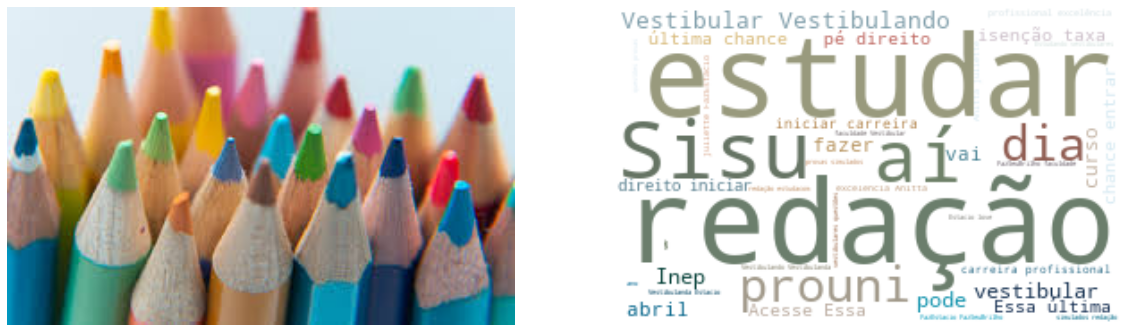

In [31]:
drawWordCloud(filtered_tweets,'enemTW1')